### Modelo para reconocer lenguaje de signos para letras

In [1]:
import pandas as pd
import numpy as np
import keras as keras
trainFile_letras = "DatasetsIAO/Letras/sign_mnist_train.csv"
testFile_letras = "DatasetsIAO/Letras/sign_mnist_test.csv"
path_npy = "DatasetsIAO/Letras/"

# Estos tienen solo una sola salida. 24x24
letras_train = pd.read_csv(trainFile_letras)
letras_test = pd.read_csv(testFile_letras)

Using TensorFlow backend.
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
print(letras_train.shape)
print(letras_test.shape)

(27455, 785)
(7172, 785)


In [3]:
letras_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
letras_train_Y = letras_train['label']
letras_train_X = letras_train.drop('label', axis=1)

letras_test_Y = letras_test['label']
letras_test_X = letras_test.drop('label', axis=1)

In [5]:
letras_train_Y

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [6]:
letras_train_X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [7]:
from keras.utils import np_utils

# Hacemos el reshape para que las imagenes tengan el tamaño correcto
letras_train_X = letras_train_X.values.reshape(letras_train_X.shape[0], 28, 28, 1)
letras_test_X = letras_test_X.values.reshape(letras_test_X.shape[0], 28, 28, 1)


# Pasamos las salidas a one hot encoding. Aunque tenemos 24 clases
# obtenemos un array de 25 posiciones. Esto se debe a que la J (numero
# 9) también se tiene en cuenta, aunque no aparezca en ningún momento.
letras_train_Y = np_utils.to_categorical(letras_train_Y)
letras_test_Y = np_utils.to_categorical(letras_test_Y)


In [8]:
print(letras_train_X.shape)
print(letras_train_Y.shape)

print(letras_test_X.shape)
print(letras_test_Y.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


In [9]:
from matplotlib import pyplot as plt

example = letras_train_X[1000].reshape(28, 28)

print(example.shape)
plt.imshow(example, cmap="gray")

(28, 28)


(28, 28)


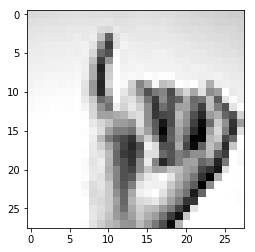

In [10]:
example = letras_train_X[1782].reshape(28, 28)

print(example.shape)
plt.imshow(example, cmap="gray")

In [11]:
from keras import models
from keras import layers

# Modelo de red neuronal
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))
          
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
________________________________________________

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(letras_train_X, letras_train_Y, batch_size=32)
test_generator = test_datagen.flow(letras_test_X, letras_test_Y, batch_size=32)

from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=letras_train_X.shape[0]//32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=letras_test_X.shape[0]//32
    )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
857/857 [==============================] - 15s 17ms/step - loss: 2.8163 - acc: 0.1912 - val_loss: 2.1484 - val_acc: 0.4573
Epoch 2/10
857/857 [==============================] - 16s 19ms/step - loss: 1.5516 - acc: 0.5347 - val_loss: 1.3347 - val_acc: 0.6632
Epoch 3/10
857/857 [==============================] - 16s 19ms/step - loss: 0.8970 - acc: 0.7240 - val_loss: 0.6250 - val_acc: 0.7660
Epoch 4/10
857/857 [==============================] - 15s 18ms/step - loss: 0.5657 - acc: 0.8224 - val_loss: 0.3880 - val_acc: 0.8507
Epoch 5/10
857/857 [==============================] - 15s 17ms/step - loss: 0.3786 - acc: 0.8816 - val_loss: 0.7726 - val_acc: 0.8661
Epoch 6/10
857/857 [==============================] - 15s 17ms/step - loss: 0.2641 - acc: 0.9176 - val_loss: 0.5243 - val_acc: 0.8751
Epoch 7/10
192/857 [=====>........................] - ETA: 11s - loss: 0.2123 - acc: 0.9383

In [ ]:
model.save("modelo.h5")

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, acc, 'b', linewidth=1.0, label='Training acc')
plt.plot(epochs, val_acc, 'r', linewidth=1.0, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, loss, 'b', linewidth=1.0, label='Training loss')
plt.plot(epochs, val_loss, 'r', linewidth=1.0, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
